<a href="https://colab.research.google.com/github/mlukan/GDA3B2021/blob/main/ProjectGroup2/GDA_Project_Group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GDA Project Group 2

##Profiling hate speach spreders on Twitter

**Additional Hints**

You can use whatever data you can find additionally to the data we provided, but
don’t spend too much time on searching.
This project is about applying the skills you learned during GDA. It is not about
developing the perfect solution for a given problem.
The project might be a little bit harder than what you are used to. Take it as a “bridge”
to the practice phase.
Your trainers are available in case you need a nudge in the right direction.

# 1. Understand the content that is available in the dataset.

In [9]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

drive_path = '/content/drive/My Drive/Colab Notebooks/GDA Project Group 2/pan21-author-profiling-training-2021-03-14/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# read_xml is not standard part os pandas. It needs to be installed

In [3]:
pip install pandas_read_xml

     |████████████████████████████████| 348kB 12.2MB/s 
     |████████████████████████████████| 143kB 37.2MB/s 
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [11]:
# More at:
# https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.read_xml.html
# https://stackoverflow.com/questions/40554657/module-pandas-has-no-attribute-read-csv/40554730

# This is just for understand how this read xml works.
import pandas as pd
import pandas_read_xml as pdx
from pandas_read_xml import flatten

# As you can see, loaded Data Frame has only one ROW. It needs further processing.
df = pdx.read_xml(f"{drive_path}en/0a3ce42bea89e2a92a28f685735e605e.xml")
df.head()

FileNotFoundError: ignored

# 2. Pre-process the data to improve the final results.

In [6]:
# Data Frame needs to be 3 times flatten to reach expected shape.
df = df.pipe(flatten).pipe(flatten).pipe(flatten)
df.head()

NameError: ignored

In [ ]:
df['author|documents|document'].iloc[0]

'"Hey Jamal (snickering uncontrollable) You want some (PFFF) LEMONADE!" What an IDIOT! #URL#'

In [ ]:
# Load all IDs from truth.txt
# and use it for loading
my_file1 = open(f"{drive_path}en/truth.txt", "r")
content = my_file1.read()
content_list_en = content.split("\n")
# Just see how does it look like
for i in content_list_en:
  print(i.split(':'))

['639b8e5e6a527d494c85d8f5704b1a01', '', '', '0']
['f2b1fc84c500c38a93522efbd422b559', '', '', '0']
['10b2d013382e1fb3c9414ea28329f258', '', '', '0']
['26644d1348fc1122e8c5ef45d6bc84fa', '', '', '0']
['4d4c5dcbfe38d0d33a0d1b1419952ca8', '', '', '0']
['86a7f84c2dd126dac46270b6c912952c', '', '', '0']
['88d8ac4ae2d91e681ee8a8d3b60fd911', '', '', '0']
['2a9776a2909ba5e27043faf2d57ba410', '', '', '0']
['fdb47a3f65091b9a5b989e1722c9fac4', '', '', '0']
['5625ca3bc44c89d763221b663f7c0987', '', '', '0']
['9d08913250938aadcf6c18d0c89a0d14', '', '', '0']
['5027d4e88fc5179e027a12872dfe6835', '', '', '0']
['e30577895cbb4d8f073e4dbb2f3be6d1', '', '', '0']
['06893abba0bb8f94fed7562350233ed7', '', '', '0']
['6fd5e2e31d6c2b2eb4b5dc07280636a7', '', '', '0']
['8b525999b04b19255b32365e49b281ac', '', '', '0']
['58584745632b5367da1c7a9af746222b', '', '', '0']
['9d58d6313bfb2fba9e1e45bb9d65cf0b', '', '', '0']
['e6e216a24993a72629629da7c182c3af', '', '', '0']
['94b5cb02328011bbecaf78d79d2c1ff5', '', '', '0']


In [12]:
# Try to load EN files
from tqdm import tqdm # Very nice feature indeed :)
df_en  = pd.DataFrame(columns=['author|@lang',	'author|@class',	'author|documents|document'])
for i in tqdm(content_list_en):
  ID = i.split(':')[0] # Take ID from current line
  Mark = i.split(':')[-1] # Tke Mark from current line
  # Load and process current XML file
  df1 = pdx.read_xml(f"{drive_path}en/{ID}.xml")
  df1 = df1.pipe(flatten).pipe(flatten).pipe(flatten)
  # Add identification collumns to dataframe
  df1['ID'] = ID
  # 0 = None hate speech; 1 = hate speech
  df1['Mark'] = Mark
  # add temporarry DF to Final
  df_en = pd.concat([df_en , df1], ignore_index=True)

# 200 different authors with 200 Tweets each
df_en

NameError: ignored

In [13]:
# Try to load ES files
my_file2 = open(f"{drive_path}es/truth.txt", "r")
content2 = my_file2.read()
content_list_es = content2.split("\n")

from tqdm import tqdm # Wery nice feature indeed :)
df_es  = pd.DataFrame(columns=['author|@lang',	'author|@class',	'author|documents|document'])
for i in tqdm(content_list_es):
  ID = i.split(':')[0] # Take ID from current line
  Mark = i.split(':')[-1] # Tke Mark from current line
  # Load and process current XML file
  df2 = pdx.read_xml(f"{drive_path}es/{ID}.xml")
  df2 = df2.pipe(flatten).pipe(flatten).pipe(flatten)
  # Add identification collumns to dataframe
  df2['ID'] = ID
  df2['Mark'] = Mark
  # add temporarry DF to Final
  df_es = pd.concat([df_es , df2], ignore_index=True)
  
# 200 different authors with 200 Tweets each
df_es

FileNotFoundError: ignored

In [ ]:
# Clean RT #USER#: at the beginning
df_en['author|documents|document'] = df_en['author|documents|document'].str.replace('RT #USER#: ','').str.replace('#USER#','').str.replace('#URL#','').str.replace('#HASHTAG#','')
df_es['author|documents|document'] = df_es['author|documents|document'].str.replace('RT #USER#: ','').str.replace('#USER#','').str.replace('#URL#','').str.replace('#HASHTAG#','')


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Clean all #HashTags#
df_es['author|documents|document'] = df_es['author|documents|document'].str.replace('\#(?<=\#).*(?=\#)\#','', regex=True)
df_en['author|documents|document'] = df_en['author|documents|document'].str.replace('\#(?<=\#).*(?=\#)\#','', regex=True)

In [ ]:
from google.colab import data_table
data_table.DataTable(df_en[df_en['Mark'] == '1'] ,include_index=False, num_rows_per_page=10)

In [ ]:
data_table.DataTable(df_es, include_index=False, num_rows_per_page=10)

# 3. SVM model

# a. Follow a Support Vector Machine (SVM) based approach to classify users.

In [40]:
import requests
from zipfile import ZipFile
import io
import pandas as pd
import os
import xml.etree.ElementTree as ET
import re

path="https://github.com/mlukan/GDA3B2021/raw/main/ProjectGroup2/"
r = requests.get(path+'en.zip')
enlist=[]    
with ZipFile(io.BytesIO(r.content))  as zf:
     zf.extractall('temp')
for file in os.listdir('temp/en/'):
  if 'xml' in file:   
    data = open('temp/en/'+file, "r")
    #Parse XML tree
    tree = ET.parse(data)
    root = tree.getroot()
    #Get class attribute
    cls=root.attrib['class']
    #Find all documents in file
    docs=root.find('documents')
    #Append documents to the list 'texts'
    texts = [re.sub("RT:|RT |#[A-Z]*#", "", doc.text) for doc in docs]
    #Create a dictionary containing file names, classes and texts
    enlist.append({'file':file,'class':cls,'texts':' '.join(texts)})
endf=pd.DataFrame(enlist)

In [41]:
endf

file  ...                                              texts
0    efd470e6959c076c9c0456b33509e8bd.xml  ...  I don't know about this one  So  said I was ha...
1    e1f66f003824f12344cf1ace242adf0e.xml  ...  : Update: House GOP voted again to pay federal...
2    a7d4e6f2aa8543a448b5a07feab9fc49.xml  ...   Union didn’t sue when Democrats shutdown the ...
3    b4030e7f9f049a602defab723599fdeb.xml  ...    Banned for the military, used by police.  Ho...
4    97649196de83fa52ecb9312beb7e50e9.xml  ...   Then why the FUCK would you follow me, idiot ...
..                                    ...  ...                                                ...
195  6f14063ff747e2b6ed0d6b2faf3122e3.xml  ...  All ma folks b FaceTiming me they miss me 😂💜 E...
196  6f7077fae955df369bbc5f7673632dcd.xml  ...  :    We basically have no foundation of a just...
197  043e2766cc6d22ae4e447ca5f2885a2a.xml  ...  Fuck New York    I think I'm in love Trump is ...
198  9d58d6313bfb2fba9e1e45bb9d65cf0b.xml  ...   Wait till you get out...it gets worse It real...
199  342a27905d2291b55486c257d77265b4.xml  ...   Making a profit off their dead relative. Disg...

[200 rows x 3 columns]

# b. Use tfidf as input for SVMs


In [42]:
import nltk
import string
nltk.download('stopwords') 
from nltk.corpus import stopwords
stopwordsenglish=stopwords.words('english')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemma(sentence):
  for word in stopwordsenglish:
    sentence.replace(word,'')
  return " ".join([lemmatizer.lemmatize(word) for word in sentence.split()])

endf['prep']=endf['texts'].apply(lambda x: lemma(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [43]:
endf

file  ...                                               prep
0    efd470e6959c076c9c0456b33509e8bd.xml  ...  I don't know about this one So said I wa harsh...
1    e1f66f003824f12344cf1ace242adf0e.xml  ...  : Update: House GOP voted again to pay federal...
2    a7d4e6f2aa8543a448b5a07feab9fc49.xml  ...  Union didn’t sue when Democrats shutdown the g...
3    b4030e7f9f049a602defab723599fdeb.xml  ...  Banned for the military, used by police. Horse...
4    97649196de83fa52ecb9312beb7e50e9.xml  ...  Then why the FUCK would you follow me, idiot f...
..                                    ...  ...                                                ...
195  6f14063ff747e2b6ed0d6b2faf3122e3.xml  ...  All ma folk b FaceTiming me they miss me 😂💜 Ev...
196  6f7077fae955df369bbc5f7673632dcd.xml  ...  : We basically have no foundation of a just go...
197  043e2766cc6d22ae4e447ca5f2885a2a.xml  ...  Fuck New York I think I'm in love Trump is awe...
198  9d58d6313bfb2fba9e1e45bb9d65cf0b.xml  ...  Wait till you get out...it get worse It really...
199  342a27905d2291b55486c257d77265b4.xml  ...  Making a profit off their dead relative. Disgr...

[200 rows x 4 columns]

In [48]:
X,y=endf['prep'],endf['class']
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=32,test_size=0.2)

tfidf=TfidfVectorizer()
tfidfvec = tfidf.fit(X_train)
X_train_tfidf = tfidfvec.transform(X_train)
X_test_tfidf=tfidfvec.transform(X_test)



In [49]:
X_train_tfidf.shape,X_test_tfidf.shape

((160, 20890), (40, 20890))

In [172]:
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score

modSVM = svm.SVC(C=1, kernel='linear',class_weight={'0':2,'1':2})
modSVM.fit(X_train_tfidf,y_train)
predictions = modSVM.predict(X_test_tfidf)
print("Accuracy: ",accuracy_score(predictions, y_test)*100)

Accuracy:  72.5


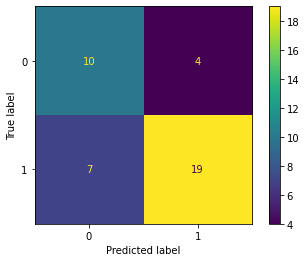

In [173]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=modSVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modSVM.classes_)
disp.plot(values_format = '');

In [161]:
from numpy import mean
from numpy import std

from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
# create model
mod = svm.SVC(C=1.0, kernel='linear')
# evaluate model
scores = cross_val_score(mod, tfidf.fit_transform(X), y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.665 (0.062)


# c. Analyze the outcomes.

# OPTIONAL:

# d. Test different lengths of N-Grams and report the best N in which the classifier achieved the best performance

In [142]:
tfidf2=TfidfVectorizer(ngram_range=(1,2))
tfidfvec2 = tfidf2.fit(X_train)
X_train_2gram = tfidfvec2.transform(X_train)
X_test_2gram=tfidfvec2.transform(X_test)

In [158]:

modSVM2 = svm.SVC(C=1.0, kernel='linear')
modSVM2.fit(X_train_2gram,y_train)

predictions2 = modSVM2.predict(X_test_2gram)
print("Accuracy: ",accuracy_score(predictions2, y_test)*100)

Accuracy:  70.0


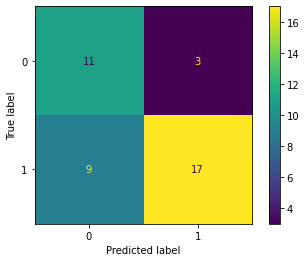

In [159]:
cm = confusion_matrix(y_test, predictions2, labels=modSVM2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modSVM2.classes_)
disp.plot(values_format = '');

In [174]:
endf

file  ...                                               prep
0    efd470e6959c076c9c0456b33509e8bd.xml  ...  I don't know about this one So said I wa harsh...
1    e1f66f003824f12344cf1ace242adf0e.xml  ...  : Update: House GOP voted again to pay federal...
2    a7d4e6f2aa8543a448b5a07feab9fc49.xml  ...  Union didn’t sue when Democrats shutdown the g...
3    b4030e7f9f049a602defab723599fdeb.xml  ...  Banned for the military, used by police. Horse...
4    97649196de83fa52ecb9312beb7e50e9.xml  ...  Then why the FUCK would you follow me, idiot f...
..                                    ...  ...                                                ...
195  6f14063ff747e2b6ed0d6b2faf3122e3.xml  ...  All ma folk b FaceTiming me they miss me 😂💜 Ev...
196  6f7077fae955df369bbc5f7673632dcd.xml  ...  : We basically have no foundation of a just go...
197  043e2766cc6d22ae4e447ca5f2885a2a.xml  ...  Fuck New York I think I'm in love Trump is awe...
198  9d58d6313bfb2fba9e1e45bb9d65cf0b.xml  ...  Wait till you get out...it get worse It really...
199  342a27905d2291b55486c257d77265b4.xml  ...  Making a profit off their dead relative. Disgr...

[200 rows x 4 columns]

In [192]:
from collections import Counter
X_train_words=[]
[X_train_words.extend(i.split(' ')) for i in X_train]
X_train_counts= Counter(X_train_words)

In [193]:
X_train_counts

Counter({'it': 2204,
         'wa': 1186,
         'fun': 56,
         'while': 133,
         'but': 986,
         'i': 900,
         'gotta': 189,
         'gtf': 5,
         'home😂': 1,
         ':': 11270,
         '71': 2,
         'day': 446,
         'until': 132,
         'Gemini': 2,
         'season.': 4,
         'real': 250,
         'talk.': 4,
         'handle': 20,
         'anything': 117,
         'that': 2174,
         'come': 290,
         'my': 2181,
         'way': 325,
         'regardless': 9,
         'fr': 54,
         '🚮': 2,
         'baby': 135,
         'said': 263,
         'we': 778,
         'gonna': 153,
         'have': 1340,
         'a': 6785,
         'house': 78,
         'out': 841,
         'here': 276,
         'and': 3951,
         'love': 527,
         'bc': 41,
         'yasss': 1,
         'speak': 60,
         'shit': 651,
         'into': 227,
         'existence': 9,
         'bae': 13,
         '😘😂😂': 1,
         'i’m': 123,
         'rea

# e. Report the top 10 representative (most repeated) 1, 2 and 3-grams for each of the classes.

# 4. LSTM model




# a. Build a LSTM (Long Short-term Memory) text classifier with the same goal as above.

# b. Analyze the outcomes.

# 6. Compare the results of both models using the F1 measure.


# 7. Obtain statistics that can corroborate the results achieved and explain the reason for these choices.